# Projekt1 - Beizen der Schweiz, die Ochsentour

## Arbeiten mit API, requests BeautifulSoup, arrangieren mit Pandas, Visualisierung

### Nenn mir deine Stammbeiz und ich sage dir, wo du wohnst

Welches sind die vorherrschenden Beizennamen pro Kanton? 

Nachdem die **Swisscom Directories AG API mich in die Sackgasse geführt hat,** die Übung auf die manuelle Tour (ziemlich sicher ohne Selenium, da muss ich mich noch besser einarbeiten)... ups, funktioniert auch nicht, denn es lassen sich nicht mehr als 200 Einträge scrapen!

Also von vorne: in Handarbeit habe ich alle Beizennamen rausgesucht, die schweizweit mehr als 200 Einträge haben. Dies muss ich nun **via API** pro Kanton absuchen und zusammenstellen.

Folgende zehn Beizennamen sind in der Auswahl (inkl. französische und italienische Übersetzung):

  **-Rössli   -Löwen   -Hirschen   -Bären   -Sonne   -Linde   -Kreuz   -Sternen   -Engel   -Post**
  
Mein persönlicher API Schlüssel: 590ea8961488f9a63dbf95a7b7883805

https://tel.search.ch/api/help


BEISPIEL: https://tel.search.ch/api/?was=john+meier&key=Ihr Schlüssel


  

In [12]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

%matplotlib inline

# Als Erstes alles importieren, was ich glaube zu brauchen...

### Dann hole ich mir die Website, mit deren API ich arbeite

Anhand der API Spezifikationen kann ich mir die genauen Parameter raussuchen, nach denen ich suchen will.
Hier **was** (für Restaurant) , **wo** (für Kanton), und da TelSearch die requests auf 200 beschränkt hat die **maxnum** und **pos** (um eine Schlaufe bilden zu können für alle Einträge die mehr als 200 (maxnum) sind.

In [56]:
"https://tel.search.ch/api/?was=Restaurant&key=590ea8961488f9a63dbf95a7b7883805"

'https://tel.search.ch/api/?was=Restaurant&key=590ea8961488f9a63dbf95a7b7883805'

Durch die Spezifikationen passe ich meine URL an und speichere sie gleich in eine Variable. Das unten heisst so viel wie alle Einträge in Restaurants des Kantons Schaffhausen, einer der zehn Namen (wegen der maxnum!!! GRRRR), bitte.

In [57]:
url = "https://tel.search.ch/api/?was=Restaurant+Loewen&wo=SH&key=590ea8961488f9a63dbf95a7b7883805"

Mit **requests** rufe ich die Website auf, auch dies wird gleich in eine Variable **response** gepackt.

In [58]:
response = requests.get(url)

Was spuckt er aus? Erste Kontrolle, ob mein request richtig verpackt war. Und das dann gleich noch als Textausgabe.

In [59]:
response

<Response [200]>

In [ ]:
response.text

Nun verpacke ich die URL in verschiedene Variablen um damit übersichtlicher arbeiten zu können. Dies gibt dann die nächste Variable **url_sh_loewen** und meine nächste Kontrolle, ob die Anfrage richtig gestellt war.

In [60]:
basis = "https://tel.search.ch/api/?"
resto_loewen = "was=Restaurant+Loewen&"
wo = "wo=SH&"
key = "&key=590ea8961488f9a63dbf95a7b7883805"

In [61]:
url_sh_loewen = basis + resto_loewen + wo + key

In [62]:
requests.get(url_sh_loewen)

<Response [200]>

In [63]:
requests.get(url_sh_loewen).text

'<?xml version="1.0" encoding="utf-8" ?>\n<feed xml:lang="de" xmlns="http://www.w3.org/2005/Atom" xmlns:openSearch="http://a9.com/-/spec/opensearchrss/1.0/" xmlns:tel="http://tel.search.ch/api/spec/result/1.0/">\n  <id>https://tel.search.ch/api/590ea8961488f9a63dbf95a7b7883805/8391a826dd819d02f15c23a107491e08</id>\n  <title type="text">tel.search.ch API Search Results</title>\n  <generator version="1.0" uri="https://tel.search.ch">tel.search.ch</generator>\n  <updated>2018-10-13T02:00:00Z</updated>\n  <link href="https://tel.search.ch/result.html?was=Restaurant+Loewen&amp;kanton=SH" rel="alternate" type="text/html" />\n  <link href="http://tel.search.ch/api/?was=Restaurant+Loewen&amp;wo=SH&amp;key=590ea8961488f9a63dbf95a7b7883805" type="application/atom+xml" rel="self" />\n  <openSearch:totalResults>1</openSearch:totalResults>\n  <openSearch:startIndex>1</openSearch:startIndex>\n  <openSearch:itemsPerPage>10</openSearch:itemsPerPage>\n  <openSearch:Query role="request" searchTerms="Res

Ich will mir die zusammengesetzte Website-URL nochmals anschauen...

In [64]:
print(url_sh_loewen)

https://tel.search.ch/api/?was=Restaurant+Loewen&wo=SH&&key=590ea8961488f9a63dbf95a7b7883805


Wie in JupyterNotebook "Beizen der Schweiz" beschrieben, nix mit json.XML. 
Ich pack die ganze Sache in BeautifulSoup. 
Und wie im ersten Notebook beschrieben, suche ich nach "entry". 

In [65]:
r = requests.get(url_sh_loewen)

In [66]:
contents = r.text #Wandeln wir den Text in ein Format um, mit dem BeautifulSoup umgehen kann.
soup = BeautifulSoup(contents,'html.parser') #Geben wir das an BeautifulSoup weiter
entries = soup.find_all('entry') #Nun lesen wir Titel aus.
len(entries) #Schauen wir, wie lange die Titel sind.

1

### Der neue Workaround... 

Alles wie in Teil 1 : )
Also baue ich mir ein leeres Dataframe, wo ich dann wie in einen Container alles abfüllen kann. Ich brauche einen Boolean, verschiedene Variablen, neu für die verschiedenen Namen der Beizen pro Kanton. 

Und ja, wo es pro Kanton weniger als 200 Restaurants gibt, ziehe ich natürlich alle raus, um mir mehrere Requests pro Kanton sparen zu können...

Das ganze wird in mehrere CSV's gespeichert, um danach weiterarbeiten zu können.


In [351]:
df = pd.DataFrame({"Restaurantname":[], "Kanton":[]})
df.head()

kanton = "FR"
restoname = "Ange"
basis = "https://tel.search.ch/api/?"
was = "was=Restaurant%20" + restoname + "&"
wo = "wo="+ kanton + "&"
key = "&key=590ea8961488f9a63dbf95a7b7883805"
    
url_fr_ange = basis + was + wo + key
#print(url_sh_sternen)
    
r = requests.get(url_fr_ange)
soup = BeautifulSoup(r.text, 'html.parser')
#print(soup.find("opensearch:totalresults").text)
    
#Alle Entrys vom aktuellen file durchsuchen
entries = soup.find_all("entry")
for entry in entries:
        print (entry.find("title").text)
        restaurantname = entry.find("title").text
        df = df.append({"Restaurantname": restaurantname},ignore_index=True)
    
print("finito")

Restaurant de l'Ange
Auberge de l'Ange
Auberge de l'Ange
Café de l'Ange Fribourg Sàrl
de l'Ange Sarl
Ange
Restaurant Punkt - Salle Grenette
Restaurant Alpenrose
da Pino Ristorante Frohheim
Schloss Ueberstorf
finito


In [352]:
df.to_csv("export_csv/export_" + kanton + "_" + restoname + ".csv", sep = ";" , index = False)

## CSVs bereinigen

die Files kommen zum Teil mit komischen (falschen) Einträgen und Namen daher. Da die API immer nach einer gewissen Anzahl Abfragen pro Tag schliesst, bereinige ich die CSV in der Zweischenzeit in Atom und füge alle Einträge zu einem Kantons-CSV zusammen. Diese werden dann zu einem Schweiz total CSV zusammengefügt und wieder eingelesen.

In [14]:
"AG\n".strip()

'AG'

In [15]:
with open("CH_alle.csv") as file:
    for line in file:
        data = line.split(";")
        
        print(data)

['Restaurantname', 'Kanton\n']
['Restaurant Bären', 'AG\n']
["Pfändler's Gasthof zum Bären GmbH", 'AG\n']
['Hotel Gasthaus Bären', 'AG\n']
['Gasthof Bären', 'AG\n']
['Bären Fisibach AG', 'AG\n']
['Hotel Bären Suhr', 'AG\n']
['Restaurant Hotel Bären', 'AG\n']
['Gasthaus zum Bären', 'AG\n']
['Bären', 'AG\n']
['Bären', 'AG\n']
['Restaurant Engel', 'AG\n']
['Hotel Restaurant Engel', 'AG\n']
['Gasthof Engel', 'AG\n']
['Gasthof Engel', 'AG\n']
['Speisewirtschaft zum Blauen Engel', 'AG\n']
['Gasthaus zum Engel', 'AG\n']
['Besenbeiz Engelhof', 'AG\n']
['Restaurant Hirschen', 'AG\n']
['Restaurant Hirschen/Güggeli Oase', 'AG\n']
['Restaurant Hirschen', 'AG\n']
['Restaurant Hirschen', 'AG\n']
['Restaurant Hirschen', 'AG\n']
['Gasthof Hirschen', 'AG\n']
['Landgasthaus zum Hirschen', 'AG\n']
['Gasthaus Hirschen GmbH', 'AG\n']
['Hirschen', 'AG\n']
['Hirschen Le Cachet Lenzburg', 'AG\n']
['Restaurant Kreuz', 'AG\n']
['Restaurant Brasserie Weisses Kreuz', 'AG\n']
['Landgasthof Weisses Kreuz', 'AG\n']


In [54]:
df = pd.read_csv("CH_alle_b.csv",sep = ";")

## Daten mit Pandas in df packen und durchchecken

Wie in den Schulunterlagen wundervoll beschrieben, nehme ich mein CH_alle CSV und packe es in ein Dataframe. Ist alles sauber zusammengefügt? Mit df.head und df.tail schaue ich Anfang und Ende an mit df.shape die Anzahl Einträge (stimmt!) und lasse mir mit df.describe eine Beschreibung des Files geben.

In [55]:
df.head()

,Restaurantname,Kanton
0,Bären,AG
1,Bären,AG
2,Bären,AG
3,Bären,AG
4,Bären,AG


In [56]:
df.tail(5)

,Restaurantname,Kanton
1247,Sternen,ZH
1248,Sternen,ZH
1249,Sternen,ZH
1250,Sternen,ZH
1251,Sternen,ZH


In [57]:
df.shape

(1252, 2)

In [58]:
len(df)

1252

In [59]:
df.describe()

,Restaurantname,Kanton
count,1252,1252
unique,28,26
top,Sonne,BE
freq,116,123


In [60]:
df['Kanton']

0       AG
1       AG
2       AG
3       AG
4       AG
5       AG
6       AG
7       AG
8       AG
9       AG
10      AG
11      AG
12      AG
13      AG
14      AG
15      AG
16      AG
17      AG
18      AG
19      AG
20      AG
21      AG
22      AG
23      AG
24      AG
25      AG
26      AG
27      AG
28      AG
29      AG
        ..
1222    ZH
1223    ZH
1224    ZH
1225    ZH
1226    ZH
1227    ZH
1228    ZH
1229    ZH
1230    ZH
1231    ZH
1232    ZH
1233    ZH
1234    ZH
1235    ZH
1236    ZH
1237    ZH
1238    ZH
1239    ZH
1240    ZH
1241    ZH
1242    ZH
1243    ZH
1244    ZH
1245    ZH
1246    ZH
1247    ZH
1248    ZH
1249    ZH
1250    ZH
1251    ZH
Name: Kanton, Length: 1252, dtype: object

## Erste Werte, die ich brauche

Als Basis für meine Visualisierung benötige ich die Anzahl Restaurants pro Kanton. Ein einfacher value_counts als Variable verpackt und als neues CSV rausspeichern... dann das Ganze gleich nochmals nachkontrollieren.

In [61]:
df["Kanton"].value_counts()

BE    123
AG     97
SG     94
ZH     91
TG     82
VD     73
LU     69
SO     69
SZ     62
VS     50
FR     48
GR     47
AR     44
BL     41
JU     40
TI     32
GE     30
ZG     28
NE     26
UR     24
GL     22
AI     16
OW     13
NW     13
BS      9
SH      9
Name: Kanton, dtype: int64

In [62]:
anz_beizen_kanton = df["Kanton"].value_counts()

In [63]:
path = 'aus_python/anz_beizen_kanton.csv'

In [64]:
anz_beizen_kanton.to_csv(path, index=True)

In [65]:
check = pd.read_csv(path)

In [66]:
check

,BE,123
0,AG,97
1,SG,94
2,ZH,91
3,TG,82
4,VD,73
5,LU,69
6,SO,69
7,SZ,62
8,VS,50
9,FR,48


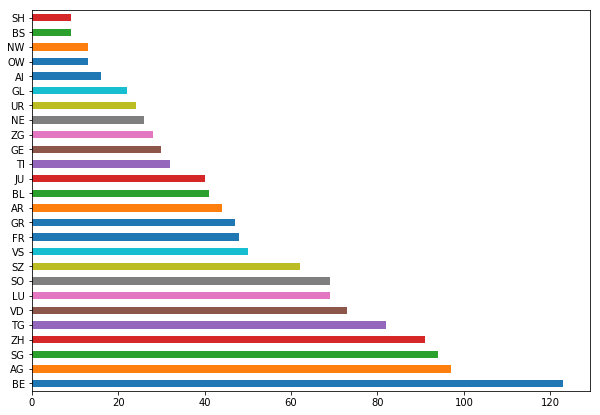

In [67]:
df["Kanton"].value_counts().plot(kind="barh", figsize=(10,7))

## Die einzelnen Restaurantnamen...

Nun wirds etwas tricky: Da meine Suche verschiedene Landesprachen umfasst und einfach das Wort im gesamten Namen vorkommen muss, werde ich die einzelnen Namen in Listen zusammenfassen, damit Rössli auch Cheval, Cheval blanc oder Cavallino beinhaltet, etc.

In [87]:
df["Restaurantname"].value_counts().head(30)

Sonne       116
Rössli      115
Post        106
Sternen     102
Kreuz       100
Hirschen     98
Löwen        97
Linde        91
Bären        72
Croix        45
Engel        44
Soleil       40
Cheval       35
Lion         33
Poste        32
Etoile       30
Cerf         20
Ours         17
Ange         13
Crusch       10
Sole         10
Posta        10
Stella        6
Chaux         4
Croce         3
Cervo         1
Angelo        1
Leone         1
Name: Restaurantname, dtype: int64

In [79]:
from collections import Counter

#z = df["Restaurantname"]
#Counter(z)

In [81]:
anz_beizennamen = df["Restaurantname"].value_counts()

In [82]:
path = 'aus_python/anz_beizennamen.csv'

In [83]:
anz_beizennamen.to_csv(path, index=True)

In [84]:
check = pd.read_csv(path)

In [85]:
check

,Sonne,116
0,Rössli,115
1,Post,106
2,Sternen,102
3,Kreuz,100
4,Hirschen,98
5,Löwen,97
6,Linde,91
7,Bären,72
8,Croix,45
9,Engel,44


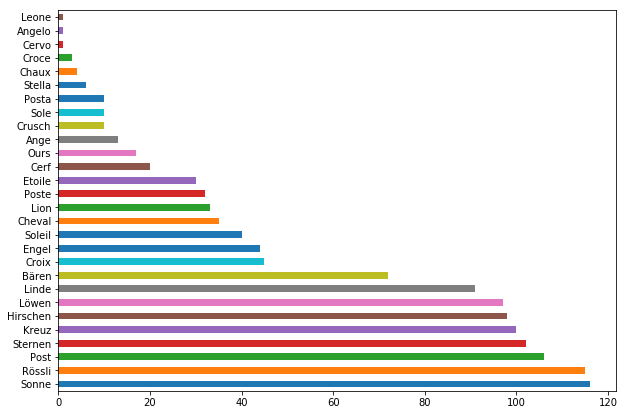

In [86]:
df["Restaurantname"].value_counts().plot(kind="barh", figsize=(10,7))